## Employee Exit Surveys
In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) and the [Technical and Further Education (TAFE)](https://en.wikipedia.org/wiki/Technical_and_further_education) institute in Queensland, Australia. Here is the [link](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) to the TAFE exit survey here and the [link](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) to the survey for the DETE here. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

We will first look at the following quesitons:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?<br>

First, we need to upload the data, explore the columns, clean the data and merge the two datasets.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [113]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [114]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Here are some of the relevant columns:

dete_survey:
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE


tafe_survey:
* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

In [115]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [116]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [117]:
print('There are {} rows in the dete_survey dataset'.format(dete_survey.shape[0]))
dete_survey.isnull().sum()

There are 822 rows in the dete_survey dataset


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [118]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [119]:
print('There are {} rows in the tafe_survey dataset'.format(tafe_survey.shape[0]))
tafe_survey.isnull().sum()

There are 702 rows in the tafe_survey dataset


Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [120]:
print('Percent responses to Separation Type for dete_survey')
dete_survey.SeparationType.value_counts(dropna=False,normalize=True)*100

Percent responses to Separation Type for dete_survey


Age Retirement                          34.671533
Resignation-Other reasons               18.248175
Resignation-Other employer              11.070560
Resignation-Move overseas/interstate     8.515815
Voluntary Early Retirement (VER)         8.150852
Ill Health Retirement                    7.420925
Other                                    5.961071
Contract Expired                         4.136253
Termination                              1.824818
Name: SeparationType, dtype: float64

In [121]:
print('Percent responses to Reason for ceasing employment for tafe_survey')
tafe_survey['Reason for ceasing employment'].value_counts(dropna=False, normalize=True)*100

Percent responses to Reason for ceasing employment for tafe_survey


Resignation                 48.433048
Contract Expired            18.091168
Retrenchment/ Redundancy    14.814815
Retirement                  11.680912
Transfer                     3.561254
Termination                  3.276353
NaN                          0.142450
Name: Reason for ceasing employment, dtype: float64

The dete_survey data contains entries 'Not Stated' instead of NaN for missing values.  There are many columns that aren't necessary for our analysis. The data sets contain many of the same columns but with different names.  

In [122]:
#reread the dete survey recording na values as NaN instead of Not Stated
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [123]:
#Drop the following columns from dete
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [124]:
#Drop the following columns from tafe
tafe_survey.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [125]:
dete_survey.drop(dete_survey.columns[28:49],axis=1,inplace=True)

In [126]:
tafe_survey.drop(tafe_survey.columns[17:66],axis=1,inplace=True)

#### Clean column names and create common name for the datasets
* Make lower case
* Strip whitespace from end
* Replace spaces with _

Update the following columns name in tafe:
* 'Record ID': 'id'
* 'CESSATION YEAR': 'cease_date'
* 'Reason for ceasing employment': 'separationtype'
* 'Gender. What is your Gender?': 'gender'
* 'CurrentAge. Current Age': 'age'
* 'Employment Type. Employment Type': 'employment_status'
* 'Classification. Classification': 'position'
* 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
* 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [127]:
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [128]:
map_dict={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [129]:
tafe_survey=tafe_survey.rename(map_dict, axis=1)
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

#### Resignation data.  We will filter the data to look at only resignation for `separation_type`
In the dete data there are three entries we will combine to one:
* `Resignation-Other reasons`
* `Resignation-Other employer`
* `Resignation-Move overseas/interstate`

In [130]:
dete_survey.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [131]:
dete_survey.separationtype=dete_survey.separationtype.str.split('-').str[0]
dete_survey.separationtype.value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [146]:
dete_resignation=dete_survey[dete_survey['separationtype']=='Resignation'].copy()
tafe_resignation=tafe_survey[tafe_survey['separationtype']=='Resignation'].copy()

#### clean the start and cease date columns and check for inconsistencies
* in dete_resignation, columns `cease_date` and `dete_start_date`
* in tafe_resignation, columns `cease_date`

In [147]:
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [148]:
#Extract just the year in cease_date
dete_resignation['cease_date']=dete_resignation['cease_date'].str.split('/').str[-1].astype(float)
dete_resignation['cease_date'].value_counts().sort_index(ascending=True)


2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [149]:
dete_resignation['dete_start_date'].astype('float')
dete_resignation['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [150]:
tafe_resignation['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

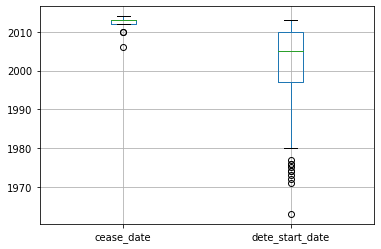

In [152]:
df=dete_resignation.boxplot(column=['cease_date','dete_start_date'])
plt.show()

#### Findings for dates
The dete data set has a much larger date range for start date.  There is no 2009 or 2011 cease dates for dete and no 2006 or 2014 cease dates for tafe.  We will leave teh dates for now since we are not analyzing by year.

#### Years of service
The tafe data has a column named `institute_service` that contains the length of time at the company.  The dete data does not, there we will add a column for lenght of service by subtracting the `dete_start_date` from the `cease_date`

In [153]:
dete_resignation['institute_service']=dete_resignation['cease_date']-dete_resignation['dete_start_date']

In [157]:
dete_resignation.institute_service.value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [159]:
tafe_resignation.institute_service.value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

#### Dissatisfaction columns
dete_resignation dissatisfaction columns:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

tafe_resignation columns:
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`

In [163]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [164]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [177]:
#function to convert Tafe columns to contain True, False, or NaN values only
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
#create dissatisfied column in tafe
tafe_resignation['dissatisfied']=tafe_resignation[
    ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignation_up=tafe_resignation.copy()

#create dissatisfaction column in dete
dete_resignation['dissatisfied']=dete_resignation[['job_dissatisfaction','dissatisfaction_with_the_department',
'physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions',
'work_life_balance','workload']].any(axis=1, skipna=False)
dete_resignation_up=dete_resignation.copy()

In [182]:
print('Tafe Dissatisfied','\n',10*'-')
print(tafe_resignation_up.dissatisfied.value_counts(dropna=False))
print('Dete Dissatisfied','\n',10*'-')
print(dete_resignation_up.dissatisfied.value_counts(dropna=False))

Tafe Dissatisfied 
 ----------
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64
Dete Dissatisfied 
 ----------
False    162
True     149
Name: dissatisfied, dtype: int64


The resignations due to job dissatisfaction for the Tafe data are primarily not due to dissatisfaction.  There were 91 dissatisfied compared to 241 not dissatisfied.  The Dete data was closer to even split with just under half left due to dissatisfaction.

#### Combine data sets
* add a column `institute` and assign dete or tafe to use to aggregate data
* combine the two data sets into one, `combined`
* drop columns with less than 500 non null values

In [184]:
dete_resignation_up['institute']='DETE'
tafe_resignation_up['institute']='TAFE'
combined = pd.concat([dete_resignation_up, tafe_resignation_up],ignore_index=True)
combined.notnull().sum().sort_values()

/Users/tehila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [186]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

#### Clean the service column
Categorize the employees into the following service categories:
* `New`: Less than 3 years in workplace
* `Experienced`: 3-6 years in workplace
* `Established`: 7-10 years in workplace
* `Veteren`: 11 or more years in workplace

These ranges are based off of the analysis in [this](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) article.  The article makes the argument that understanding an employee's need based on career stage instead of age is more effective.

In [187]:
#Explore the institute service column
combined_updated.institute_service.value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
36.0                   2
30.0                   2


In [190]:
combined_updated['institute_service_up']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up']=combined_updated['institute_service_up'].astype('float')

In [192]:
#function to map year to one of the stages above
def stage(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New: Less than 3 years in workplace'
    elif (year >= 3) & (year <= 6):
        return 'Experienced: 3-6 years in workplace'
    elif (year >=7) & (year<=10):
        return 'Established: 7-10 years in workplace'
    else:
        return 'Veteren: 11 or more years in workplace'
    
combined_updated['service_cat']=combined_updated['institute_service_up'].apply(stage) 

In [193]:
combined_updated.service_cat.value_counts(dropna=False)

New: Less than 3 years in workplace       193
Experienced: 3-6 years in workplace       172
Veteren: 11 or more years in workplace    136
NaN                                        88
Established: 7-10 years in workplace       62
Name: service_cat, dtype: int64

#### Aggregate data and create pivot tables
Pivot tables treat boolean values as integers so we can aggregate the dissatisfied column and calculate the number of people in each group, percentage of people in each group, and so on.

In [194]:
#Confirm dissatisfied data in column
combined_updated.dissatisfied.value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [195]:
#Fill in NaN data with False since it is the most freq and only 8 NaN values
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)

In [197]:
#Create pivot table
df = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
df

,dissatisfied
service_cat,
Established: 7-10 years in workplace,0.516129
Experienced: 3-6 years in workplace,0.343023
New: Less than 3 years in workplace,0.295337
Veteren: 11 or more years in workplace,0.485294


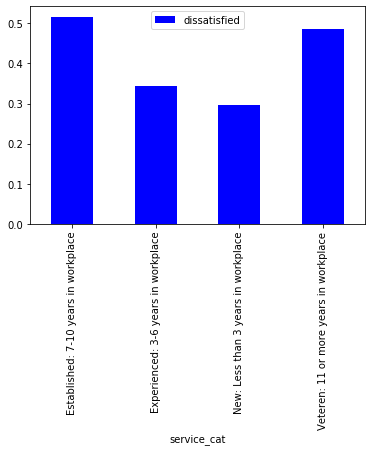

In [200]:
df.plot(kind='bar',color='blue')
plt.show()

The bar plot above indicates employees who were with the company longer were more likely to resign due to dissatisfaction than employees who were in the company for shorter periods.  Established employees who resigned responded 56% due to dissatisfaction and New employees reponded 30% dissatisfaction as reason for leaving.